<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/DB_Scan_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The Dataset used here is : for Mall Customers Dataset on Kaggle
The Steps we are following are as follows

1. **Dataset Loading**:
   - We loaded the Mall Customers dataset into our Python environment for analysis.

2. **Initial Dataset Overview**:
   - The dataset consists of columns: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100).
   - We reviewed the first few rows to understand the structure and content of the data.

3. **Data Cleaning and Checking**:
   - We checked for missing values and duplicates in the dataset.
   - Results: No missing values or duplicate records were found.

4. **Data Preprocessing**:
   - **Categorical Data Handling**: We transformed the `Gender` column from a categorical variable into a numerical format using Label Encoding. In this encoding, 'Male' was assigned `1` and 'Female' `0`.
   - **Feature Selection**: We removed the `CustomerID` column as it's a unique identifier and not relevant for clustering analysis.

5. **Clustering , Evaluation and Analysis of Clustering with Pycaret**

In [ ]:
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s 



### Step 1: Overview and Preparation

**Objective**: Understanding the dataset and preparing for the DBSCAN clustering analysis.

1. **Dataset Understanding**:
   - The Kaggle Online Retail dataset typically contains transactional data, showing the purchases made over a period. It may include columns like InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.
   - Understanding the nature of these variables (categorical or numerical) and their relevance to clustering is crucial.

2. **Environment Setup**:
   - Setting up the Python environment with necessary libraries, including PyCaret.
   - Ensuring all dependencies and the dataset are correctly loaded into our environment.

3. **Data Loading**:
   - Loading the dataset into our Python environment, usually as a Pandas DataFrame.

4. **Initial Data Exploration**:
   - Performing basic checks on the data like shape (number of rows and columns), presence of missing values, and a glimpse of the first few rows.
   - This step helps in getting a basic understanding of the dataset structure.


In [ ]:
import pandas as pd
# Load the uploaded Mall Customers dataset
file_path_mall_customers = 'Mall_Customers.csv'
mall_customers_data = pd.read_csv(file_path_mall_customers)

# Display the first few rows of the dataset to understand its structure
mall_customers_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Checking for missing values and duplicates in the dataset
missing_values = mall_customers_data.isnull().sum()
duplicates = mall_customers_data.duplicated().sum()

missing_values, duplicates


(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
 0)

### Data Cleaning and Preprocessing

**Findings**:
- The Mall Customers dataset has no missing values.
- There are no duplicate entries.

**Next Steps in Data Cleaning and Preprocessing**:
- **Categorical Data Handling**: We need to convert the `Gender` column from categorical to numerical. This is typically done using encoding methods like one-hot encoding or label encoding.
- **Feature Selection**: We'll assess if all features (CustomerID, Gender, Age, Annual Income, Spending Score) are relevant for clustering. The `CustomerID` might be redundant for clustering analysis.

**Initial Data Analysis**:
- After preprocessing, we'll conduct an initial data analysis, including statistical summaries and visual explorations to understand distributions, potential correlations, and data patterns.


In [ ]:
data = mall_customers_data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = mall_customers_data.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (190, 5)
Unseen Data For Predictions: (10, 5)


## Clustering Implemenntation with Pycaret

In [ ]:
from pycaret.clustering import *

In [ ]:
exp_clu101 = setup(data, normalize = True, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(190, 5)"
2,Transformed data shape,"(190, 5)"
3,Ordinal features,1
4,Numeric features,4
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3060,74.4994,1.2573,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,194,Female,38,113,91,Cluster 3
1,62,Male,19,46,55,Cluster 0
2,191,Female,34,103,23,Cluster 1
3,13,Female,58,20,15,Cluster 2
4,71,Male,70,49,55,Cluster 2


## Cluster visualization with Pycaret

In [ ]:
plot_model(kmeans)

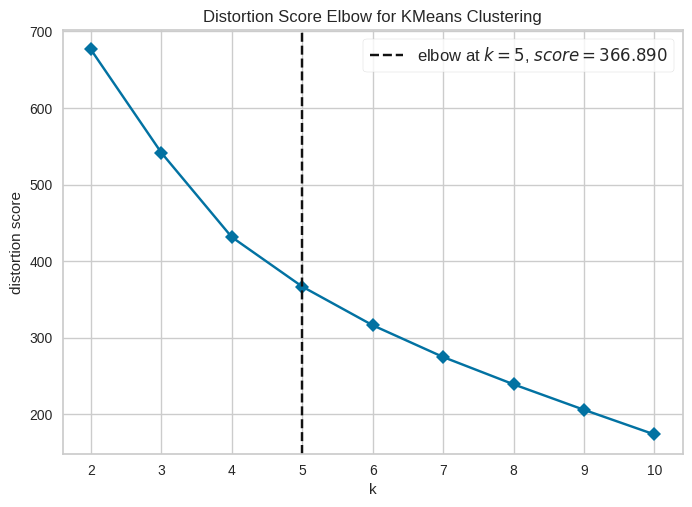

In [ ]:
plot_model(kmeans, plot = 'elbow')

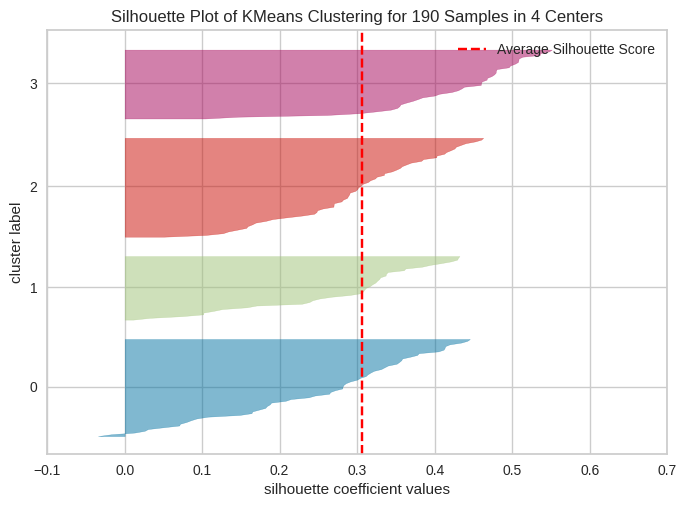

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Annual Income (k$)')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Spending Score (1-100)')

## Evaluate Model with Pycaret

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.559742,-0.843630,-0.336399,1.637728,-1.061757,Cluster 1
1,1.576985,-0.843630,-0.479868,1.637728,0.711558,Cluster 3
2,1.594227,1.185354,-0.408134,2.022456,-1.640011,Cluster 1
3,1.611470,-0.843630,-0.049459,2.022456,1.559664,Cluster 3
4,1.628713,-0.843630,0.596154,2.291766,-1.331609,Cluster 1


In [ ]:
save_model(kmeans,'Final Kmeans Model 23Nov2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O

In [ ]:
saved_kmeans = load_model('Final Kmeans Model 23Nov2023')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [ ]:
new_prediction.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,191,Female,34,103,23,Cluster 1
1,192,Female,32,103,69,Cluster 3
2,193,Male,33,113,8,Cluster 1
3,194,Female,38,113,91,Cluster 3
4,195,Female,47,120,16,Cluster 1
